<img src="img/s1.png">

<img src="img/s2.png">

<img src="img/s3.png">

<img src="img/s4.png">

<img src="img/s5.png">

<img src="img/s6.png">

<img src="img/s7.png">

<img src="img/s8.png">

<img src="img/s9.png">

<img src="img/s10.png">

<img src="img/s_API.png">

## <font color='2471A3' size=5 >Python Scripts:</font>

#### <font color='2471A3' size = 4.5>I. </font>Converting FASTA  to an appropriate format (Preparing the input)
#### <font color='2471A3' size = 4.5>II. </font>Getting data from the web server
#### <font color='2471A3' size = 4.5>III. </font>Plotting the results


#### <font color='#B9770E' size = 6><b> I. Converting FASTA to Json formatted file:  </b></font> 
##### The web APIs support only JSON format but FASTA is the most common format in bioinformatics databases 


### <center><font color='2471A3' size = 6><b> The fasta2json Function</b></font></center>
#### <font color='2471A3' size = 5>The Steps:</font>
#### The function accepts a FASTA file as input and return a JSON file as output.
###### <font color='2471A3' size = 4.5>1. </font> The  Bio module is imported 
###### <font color='2471A3' size = 4.5>1. </font> A FASTA file can be accepted as the input
###### <font color='2471A3' size = 4.5>2. </font> The output file is created (json format)
###### <font color='2471A3' size = 4.5>3. </font>The file will be parsed by Bio module and the information of sequences will be save as fasta elements  ( id and seq, etc.)
###### <font color='2471A3' size = 4.5>4. </font>Finally, the fasta elements are written in the output file with our desired format. 


In [5]:
from Bio import SeqIO
def fasta2json(fastafile):
    f = open('P53.json','w+')
    f.write('{')
    for seq_record in SeqIO.parse(fastafile,'fasta'):
        f.write('"%s": "%s",' % (seq_record.id, seq_record.seq ))
    f.write('}')
if __name__ == '__main__':
 results = fasta2json('P53.fasta')


ModuleNotFoundError: No module named 'Bio'

## <font color='#B9770E' size = 6><b>II. Getting data from DisoMine</b></font>



### <center><font color='2471A3' size = 6><b>The getDataFrom DisoMine Function</b></font>
#### This function accepts a JSON file as input and returns the DisoMine results as output.
#### Here two modules are used ("requests" and "json")


#### <font color='2471A3' size = 5>The Steps:</font>


###### <font color='2471A3' size = 4.5>1. </font> Accepts a JSON file as an input 

In [ ]:
# Read input Json file
    file = open('P53_5O1A.json', 'r')
    inputFile = file.read()

###### <font color='2471A3' size = 4.5>2. </font> Reads the file using the "JSON" module.


In [ ]:
request_json = json.loads(inputFile)

###### <font color='2471A3' size = 4.5>3. </font>Defines a variable for our API URL.


In [ ]:
# API Post URL
    post_url = "http://bio2byte.be/disomine/api/"

###### <font color='2471A3' size = 4.5>4. </font> Makes POST request with JSON input body using "post" (It accepts two urguments: I. API URL, and II. JSON file )


In [20]:
# Make POST request with Json Input body
    # WV 190206 - ADDED the 'data =' in below for it to work on Python dictionary
    
    response = requests.post(post_url, json = request_json)
    queue_id = str(response.json()['queue_id'])
    

IndentationError: unexpected indent (<ipython-input-20-ff7529e2457a>, line 4)

###### <font color='2471A3' size = 4.5>5. </font>Validates the response using status_code (Status 202 indicates that request has been accepted for processing)


In [ ]:
# Validating Response Code
    assert response.status_code == 202
    
    print("Submitted with queue ID: {}...".format(queue_id))
        

###### <font color='2471A3' size = 4.5>6. </font>Makes GET request to check queue request status. 

In [ ]:
    # Now get results - this will happen when results available or when time limit reached
    time_waited = 0    
    get_url = "http://bio2byte.be/disomine/api/queue/"
    while time_waited / TOTAL_TIME < 1.0:
      # Get Request
      response = requests.get(get_url + queue_id)
      if response.status_code == 202:
        print("  Waiting for results...")
      elif response.status_code == 200:
        queryResults = json.loads(response.text)
        break
      else:
        print("Server error, response {}.".format(response.status_code))
        break

#### <font color='2471A3' size = 5>The whole function (DisoMine):</font>

In [4]:
import requests
import json
import time

WAIT_TIME = 5
TOTAL_TIME = 60

def getDataFromDisoMine():

    # Read input Json file
    file = open('P53.json', 'r')
    inputFile = file.read()
    request_json = json.loads(inputFile)
    
    # API Post URL
    post_url = "http://bio2byte.be/disomine/api/"

    # Make POST request with Json Input body
    # WV 190206 - ADDED the 'data =' in below for it to work on Python dictionary
    response = requests.post(post_url, json = request_json)
    
    queue_id = str(response.json()['queue_id'])
    
    # Validating Response Code
    assert response.status_code == 202
    
    print("Submitted with queue ID: {}...".format(queue_id))
        
    # Now get results - this will happen when results available or when time limit reached
    time_waited = 0    
    get_url = "http://bio2byte.be/disomine/api/queue/"
    
    while time_waited / TOTAL_TIME < 1.0:

      # Get Request
      response = requests.get(get_url + queue_id)
      
      if response.status_code == 202:
        print("  Waiting for results...")

      elif response.status_code == 200:
        queryResults = json.loads(response.text)
        break
       
      else:
        print("Server error, response {}.".format(response.status_code))
        break
      
      time.sleep(WAIT_TIME)
      time_waited += WAIT_TIME


    return queryResults
    
if __name__ == '__main__':
  results = getDataFromDisoMine()
  print(results)
    

Submitted with queue ID: 196...
  Waiting for results...
  Waiting for results...
{'id': 186, 'results': [{'proteinID': 'P04637|P53_HUMAN Cellular tumor antigen', 'sequence': 'MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD', 'disomine': [0.4113033711910248, 0.5503431558609009, 0.5471815466880798, 0.506097137928009, 0.48890069127082825, 0.4662879705429077, 0.45962265133857727, 0.4359573721885681, 0.42214998602867126, 0.40029361844062805, 0.3903815746307373, 0.37155503034591675, 0.3879861533641815, 0.4265432357788086, 0.47335749864578247, 0.4369792640209198, 0.3972674012184143, 0.33916106820106506, 0.3256929814815521, 0.3145281672477722, 0.2949456

<img src="img/s11.png">

<img src="img/s12.png">

<img src="img/s13.png">

<img src="img/s14.png">

<img src="img/s15.png">

# <font color='#B9770E' size = 6><b>I. Getting data from DynaMine </b></font>


#### Creating a JSON interface which accept a json_api_key. It has six methods:




###### a. submit_sequence:  


In [ ]:
def submit_sequences(self, proteins, predictions_only=True):
        job = {'protocol': '1.0',
               'json_api_key': self._json_api_key,
               'sequences': proteins,
               'predictions_only': predictions_only,
               }
        return self._submit_job(job)

###### b. submit_uniprot_ids:


In [ ]:
def submit_uniprot_ids(self, uniprot_ids, predictions_only=True):
        job = {'protocol': '1.0',
               'json_api_key': self._json_api_key,
               'uniprot_ids': uniprot_ids,
               'predictions_only': predictions_only,
               }
        return self._submit_job(job)

###### c. submit_job: 


In [ ]:
def _submit_job(self, job):
        # response gives us a job_id
        response = self._dynamine_request(job)
        if response['status'] == 'error':
            sys.stderr.write(response['message'] + '\n')
            sys.exit(1)
        job_id = response['job_id']
        self._print_progress(response['status'], False)
        # this makes the call blocking until the results are ready
        while response['status'] != 'completed':
            time.sleep(1.5)
            response = self._poll_results(job_id)
            if response['status'] == 'error':
                sys.stderr.write(response['message'] + '\n')
                sys.exit(1)
            self._print_progress(response['status'], True)
        return response['results']

###### d. dynamine_request:


In [ ]:
 def _dynamine_request(self, request):
        # this is the post request with the json encoding of the job
        data = urllib.parse.urlencode({'batch': json.dumps(request)}).encode("utf-8")
        url = 'http://dynamine.ibsquare.be/batch_request'
        response = ''

        req = urllib.request.Request(url, data)
        http_response = urllib.request.urlopen(req)
        response = json.loads(http_response.read())

        #response = {'status': 'error', 'message': 'Unable to communicate with the server.Please verify that %s is up and running, otherwise concact the server administrator (ERROR: %s).'}

        return response

###### e. poll_results: 


In [ ]:
 def _poll_results(self, job_id):
        request = {'protocol': '1.0',
                   'json_api_key': self._json_api_key,
                   'job_id': job_id
                   }
        return self._dynamine_request(request)

###### f. print_progress:

In [ ]:
 def _print_progress(self, status, flag):
        if status == 'queued':
            if flag:
                sys.stdout.write('Waiting to be processed.\n')
            else:
                sys.stdout.write('The request has been submitted.\n')
            self._running = False
        elif status == 'running':
            if not self._running:
                self._running = True
                sys.stdout.write('The request is being processed...')
            else:
                sys.stdout.write('.')
        elif status == 'completed':
            if not self._running:
                sys.stdout.write('The request is being processed...')
            sys.stdout.write('done.\n')
        elif status == 'error':
            sys.stderr.write('\n\nError while processing the request:\n\n')
        sys.stdout.flush()

#### <font color='2471A3' size = 5>The whole function (DynaMine):</font>

In [ ]:
"""
Created by Elisa Cilia on 2014-08-20.
Copyright (c) 2014 Elisa Cilia. All rights reserved.
"""
import json
import urllib.request, urllib.parse, urllib.error
import time
import sys

# creating a JSON interface

class DynaMineJSONInterface:

    def __init__(self, json_api_key):
        self._running = False
        self._json_api_key = '3469626345366a923473c455fd6bb283621e70a3ba5428f301501f8a'

    def submit_sequences(self, proteins, predictions_only=True):
        job = {'protocol': '1.0',
               'json_api_key': self._json_api_key,
               'sequences': proteins,
               'predictions_only': predictions_only,
               }
        return self._submit_job(job)

    def submit_uniprot_ids(self, uniprot_ids, predictions_only=True):
        job = {'protocol': '1.0',
               'json_api_key': self._json_api_key,
               'uniprot_ids': uniprot_ids,
               'predictions_only': predictions_only,
               }
        return self._submit_job(job)

    def _submit_job(self, job):
        # response gives us a job_id
        response = self._dynamine_request(job)
        if response['status'] == 'error':
            sys.stderr.write(response['message'] + '\n')
            sys.exit(1)
        job_id = response['job_id']
        self._print_progress(response['status'], False)
        # this makes the call blocking until the results are ready
        while response['status'] != 'completed':
            time.sleep(1.5)
            response = self._poll_results(job_id)
            if response['status'] == 'error':
                sys.stderr.write(response['message'] + '\n')
                sys.exit(1)
            self._print_progress(response['status'], True)
        return response['results']

    def _dynamine_request(self, request):
        # this is the post request with the json encoding of the job
        data = urllib.parse.urlencode({'batch': json.dumps(request)}).encode("utf-8")
        url = 'http://dynamine.ibsquare.be/batch_request'
        response = ''

        req = urllib.request.Request(url, data)
        http_response = urllib.request.urlopen(req)
        response = json.loads(http_response.read())

        #response = {'status': 'error', 'message': 'Unable to communicate with the server.Please verify that %s is up and running, otherwise concact the server administrator (ERROR: %s).'}

        return response

    def _poll_results(self, job_id):
        request = {'protocol': '1.0',
                   'json_api_key': self._json_api_key,
                   'job_id': job_id
                   }
        return self._dynamine_request(request)

    def _print_progress(self, status, flag):
        if status == 'queued':
            if flag:
                sys.stdout.write('Waiting to be processed.\n')
            else:
                sys.stdout.write('The request has been submitted.\n')
            self._running = False
        elif status == 'running':
            if not self._running:
                self._running = True
                sys.stdout.write('The request is being processed...')
            else:
                sys.stdout.write('.')
        elif status == 'completed':
            if not self._running:
                sys.stdout.write('The request is being processed...')
            sys.stdout.write('done.\n')
        elif status == 'error':
            sys.stderr.write('\n\nError while processing the request:\n\n')
        sys.stdout.flush()


if __name__ == '__main__':
    json_api_key = 'd03e71ca849d3bc5277fd68e7a0f45124df5be84bf348db65218982f'
    dynamine = DynaMineJSONInterface(json_api_key)

    # Read input Json file
    file = open('P53_5O1A.json', 'r')
    inputFile = file.read()
    proteins = json.loads(inputFile)
    
results = dynamine.submit_sequences(proteins, predictions_only=False)
print()
results


<img src="img/s16.png">

<img src="img/s17.png">

<img src="img/s18.png">

<img src="img/s_case_study.png">

# <font color='#B9770E' size = 6><b> Plotting DisoMine, DynaMine and EFoldMine Results </b></font>

### 1. Reads the JSON formatted result


In [ ]:
file = open('Disomine_backbone_sidechain_efoldmine.json', 'r')
input = file.read()
request_json = json.loads(input)

### 2. Defines an index for each residue


In [ ]:
seq = request_json["results"][0]['sequence']

### 3. Defines the corresponding scores for each residue


In [ ]:
#DisoMine Score
disomine = request_json["results"][0]['disomine']

### 4. Creats the plot using "figure", "add_subplot" and "show" 

In [ ]:
# creating a plot
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

#ploting the DisoMine results
axes = fig.add_subplot(221)
axes.plot(range(len(seq)), disomine)
axes.set_title("DisoMine")

plt.show()

#### <font color='2471A3' size = 5>The whole function (Plitting):</font>

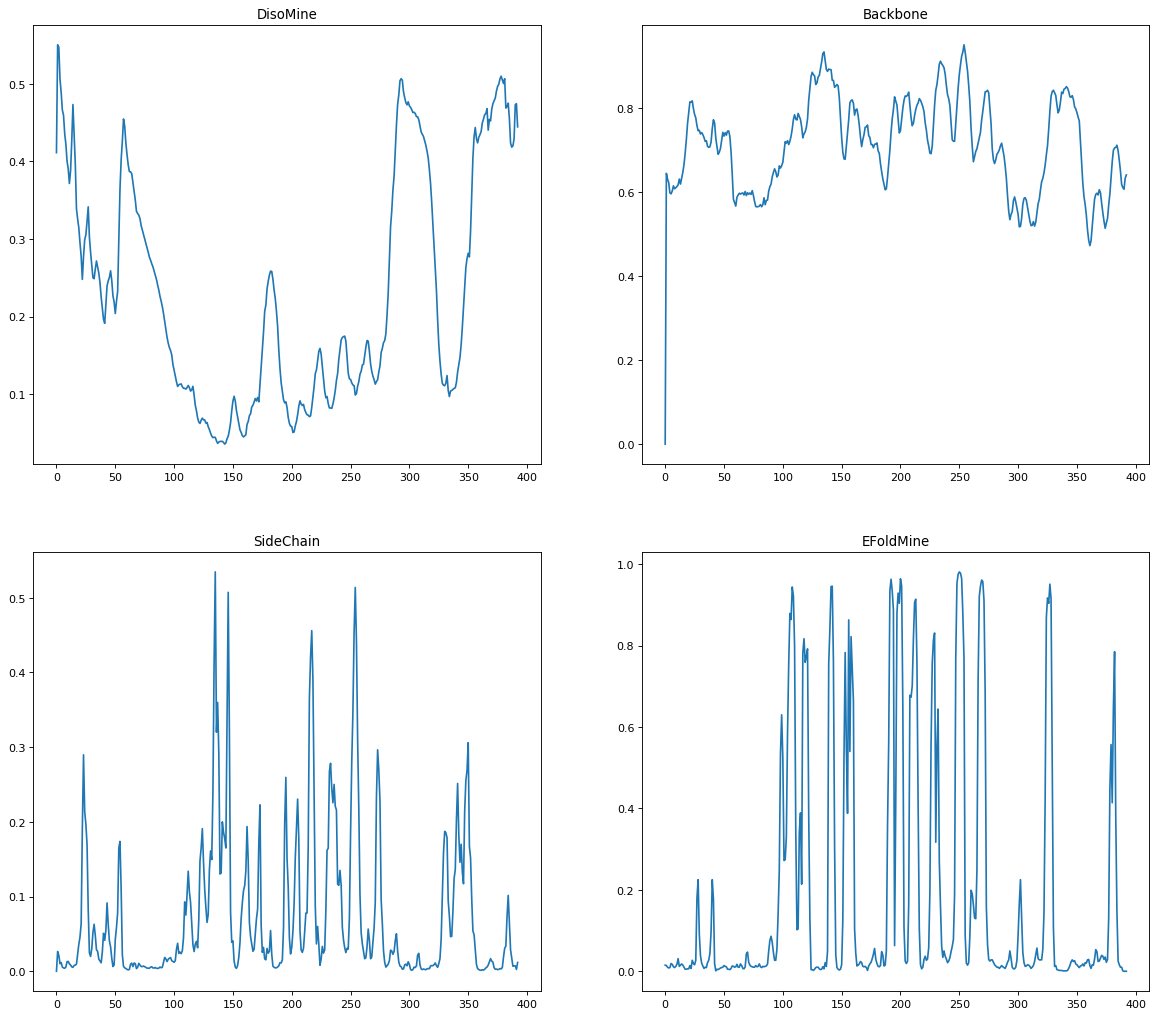

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Read input Json file
file = open('Disomine_backbone_sidechain_efoldmine.json', 'r')
input = file.read()
request_json = json.loads(input)

# residue index
seq = request_json["results"][0]['sequence']
#DisoMine Score
disomine = request_json["results"][0]['disomine']
#backbone Score
backbone = request_json["results"][0]['backbone']
#sidechain Score
sidechain = request_json["results"][0]['sidechain']
#efoldmine Score
efoldmine = request_json["results"][0]['efoldmine']
# creating a plot
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

#ploting the DisoMine results
axes = fig.add_subplot(221)
axes.plot(range(len(seq)), disomine)
axes.set_title("DisoMine")

#ploting the Backbone results 
axes = fig.add_subplot(222)
axes.plot(range(len(seq)), backbone)
axes.set_title("Backbone")

#ploting the SideChain results
axes = fig.add_subplot(223)
axes.plot(range(len(seq)), sidechain)
axes.set_title("SideChain")

#ploting the EFoldMine results
axes = fig.add_subplot(224)
axes.plot(range(len(seq)), efoldmine)
axes.set_title("EFoldMine")

plt.show()


<img src="img/s19.png">

<img src="img/s20.png">

<img src="img/s21.png">


# <font color='#B9770E' size = 6><b>Getting data from DEOGEN2</b></font>



###### <font color='2471A3' size = 4.5>1. </font>Defining the api-endpoint 


In [ ]:
    api_endpoint = "https://deogen2.mutaframe.com/fetch_results.php"


###### <font color='2471A3' size = 4.5>2. </font>Data to be sent to api 


In [ ]:
 # API key
    key = 1524214674089
    sequence_id = sequence_id
    mutation = mutation
    structure_id = 0
    # data to be sent to api
    data = {
        " ": key,
        "sequence_id": sequence_id,
        "mutation": mutation,
        "structure_id": structure_id,
    }

###### <font color='2471A3' size = 4.5>3. </font>Make POST request with Input body 

In [ ]:
    response = requests.get(api_endpoint, data)
    queryResults = json.loads(response.text)
    return queryResults

#### <font color='2471A3' size = 5>The whole function (DEOGEN2):</font>

In [ ]:
import json

def getDataFromDEOGEN2(sequence_id, mutation):

    # defining the api-endpoint
    api_endpoint = "https://deogen2.mutaframe.com/fetch_results.php"

    # API key
    key = 1524214674089
    sequence_id = sequence_id
    mutation = mutation
    structure_id = 0

    # data to be sent to api
    data = {
        " ": key,
        "sequence_id": sequence_id,
        "mutation": mutation,
        "structure_id": structure_id,
    }

    # Make POST request with Input body
    response = requests.get(api_endpoint, data)
    queryResults = json.loads(response.text)
    return queryResults

if __name__ == '__main__':
  results = getDataFromDEOGEN2(64689, 'N45S')
  print(results)



### Plotting graph from DEOGEN2 Result 

###### <font color='2471A3' size = 4.5>3. </font>Read input Json file 

In [ ]:
file = open('DEOGEN2.json', 'r')
    input = file.read()
    request_json = json.loads(input)

###### <font color='2471A3' size = 4.5>3. </font>Mutation DEOGEN2 scores 

In [ ]:
aa = 'CDSQKIPTFNGHLRWAVEYM'
    prediction = []
    mutations =[]
    for x in aa:
        if x != res[0]:
            df = request_json['all_deogen2'][res + x]
            prediction.append(df)
            mutations.append(res + x)

    deogen2 = [float(i) for i in prediction]

###### <font color='2471A3' size = 4.5>3. </font>Creating a plot 

In [ ]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

###### <font color='2471A3' size = 4.5>3. </font>ploting the DEOGEN2 results 

In [ ]:
axes = fig.add_subplot(312)
    axes.bar(mutations, deogen2)
    plt.xticks(mutations, size = 12)
    axes.set_title("Results Of DEOGEN2 For Amino Acid Replacement Of " + res , size = 15)
    plt.show()

#### <font color='2471A3' size = 5>The whole function (plotting DEOGEN2):</font>

In [ ]:
import matplotlib.pyplot as plt
import json

def deogen2plot(res):

    # Read input Json file
    file = open('DEOGEN2.json', 'r')
    input = file.read()
    request_json = json.loads(input)

    # mutation DEOGEN2 scores

    aa = 'CDSQKIPTFNGHLRWAVEYM'
    prediction = []
    mutations =[]
    for x in aa:
        if x != res[0]:
            df = request_json['all_deogen2'][res + x]
            prediction.append(df)
            mutations.append(res + x)

    deogen2 = [float(i) for i in prediction]

    # creating a plot

    fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

    #ploting the DEOGEN2 results
    
    axes = fig.add_subplot(312)
    axes.bar(mutations, deogen2)
    plt.xticks(mutations, size = 12)
    axes.set_title("Results Of DEOGEN2 For Amino Acid Replacement Of " + res , size = 15)

    plt.show()

if __name__ == '__main__':
  results = deogen2plot('R372')
  print(results)
